In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Diabetes.csv")

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.size

6903

In [7]:
df.shape

(767, 9)

<Axes: xlabel='Glucose', ylabel='Count'>

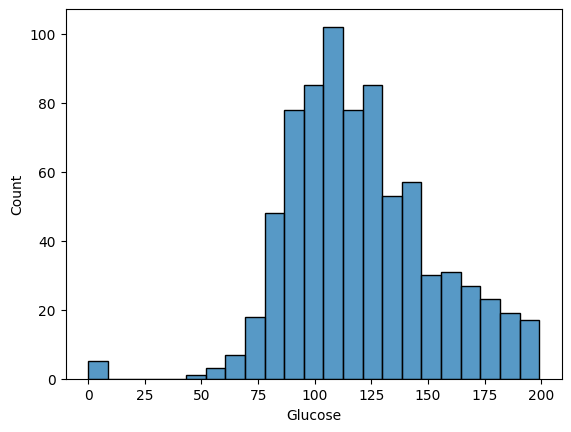

In [8]:
df["Glucose"].value_counts()
sns.histplot(x="Glucose",data=df)

In [9]:
df["Glucose"]=df["Glucose"].replace(0,np.nan)
df["Glucose"].fillna(df["Glucose"].median(),inplace=True)

<Axes: xlabel='BloodPressure', ylabel='Count'>

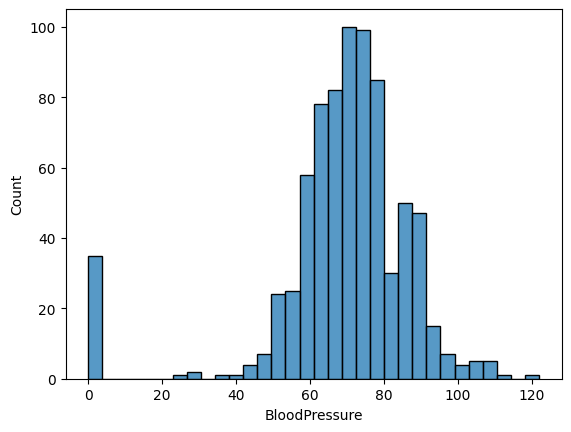

In [10]:
df["BloodPressure"].value_counts()
sns.histplot(df["BloodPressure"])

In [11]:
df["BloodPressure"]=df["BloodPressure"].replace(0,np.nan)
df["BloodPressure"].fillna(df["BloodPressure"].median(),inplace=True)


<Axes: xlabel='SkinThickness', ylabel='Count'>

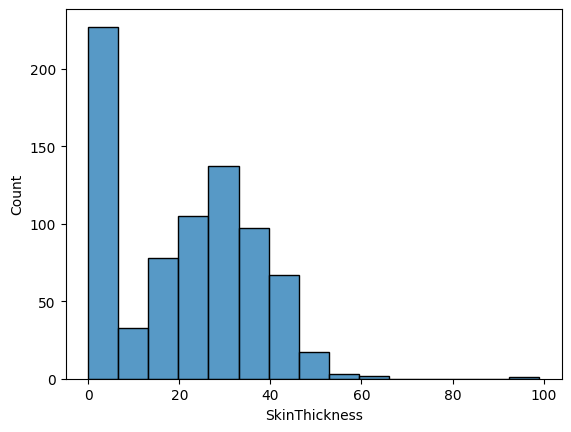

In [12]:
df["SkinThickness"].value_counts()
sns.histplot(df["SkinThickness"])

In [13]:
df["SkinThickness"]=df["SkinThickness"].replace(0,np.nan)
df["SkinThickness"].fillna(df["SkinThickness"].median(),inplace=True)


<Axes: xlabel='Insulin', ylabel='Count'>

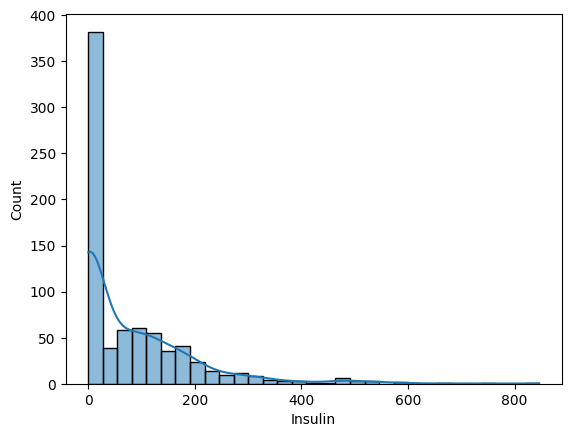

In [14]:
df["Insulin"].value_counts()
sns.histplot(df["Insulin"],kde=True)

In [15]:
df["Insulin"]=df["Insulin"].replace(0,np.nan)
df["Insulin"].fillna(df["Insulin"].median(),inplace=True)

In [16]:
df["Insulin"].value_counts()

Insulin
125.0    377
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: count, Length: 185, dtype: int64

<Axes: xlabel='BMI', ylabel='Count'>

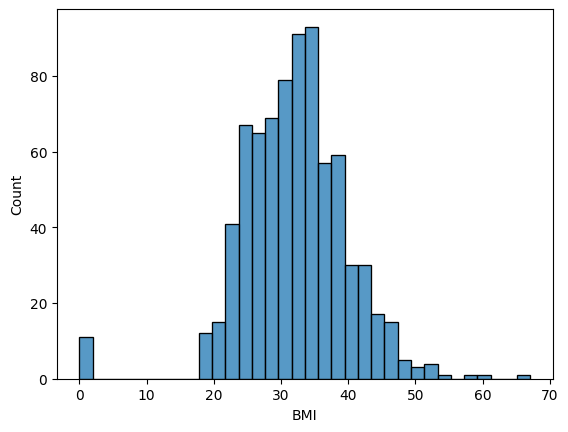

In [17]:
df["BMI"].value_counts()
sns.histplot(x="BMI",data=df)

In [18]:
df["BMI"]=df["BMI"].replace(0,np.nan)
df["BMI"].fillna(df["BMI"].median(),inplace=True)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


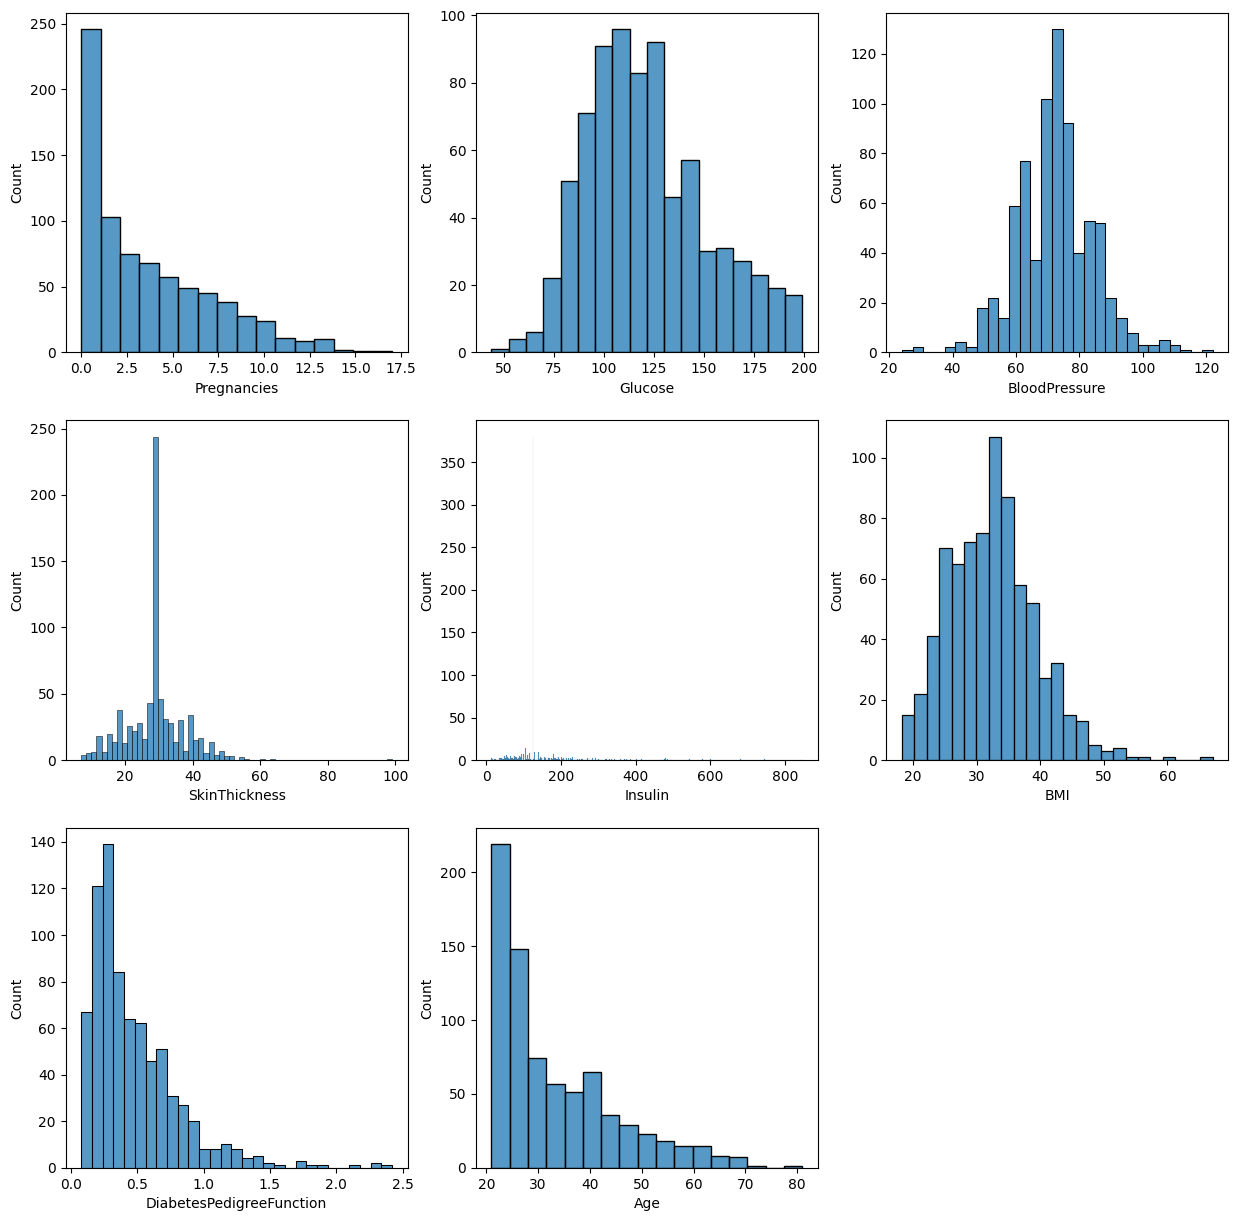

In [19]:
column=[df.columns]

plt.figure(figsize=(15,15))
for i in range(0,len(column[0])-1):
    print(column[0][i])
    plt.subplot(3,3,i+1)
    sns.histplot(x=column[0][i],data=df)
  

plt.show()


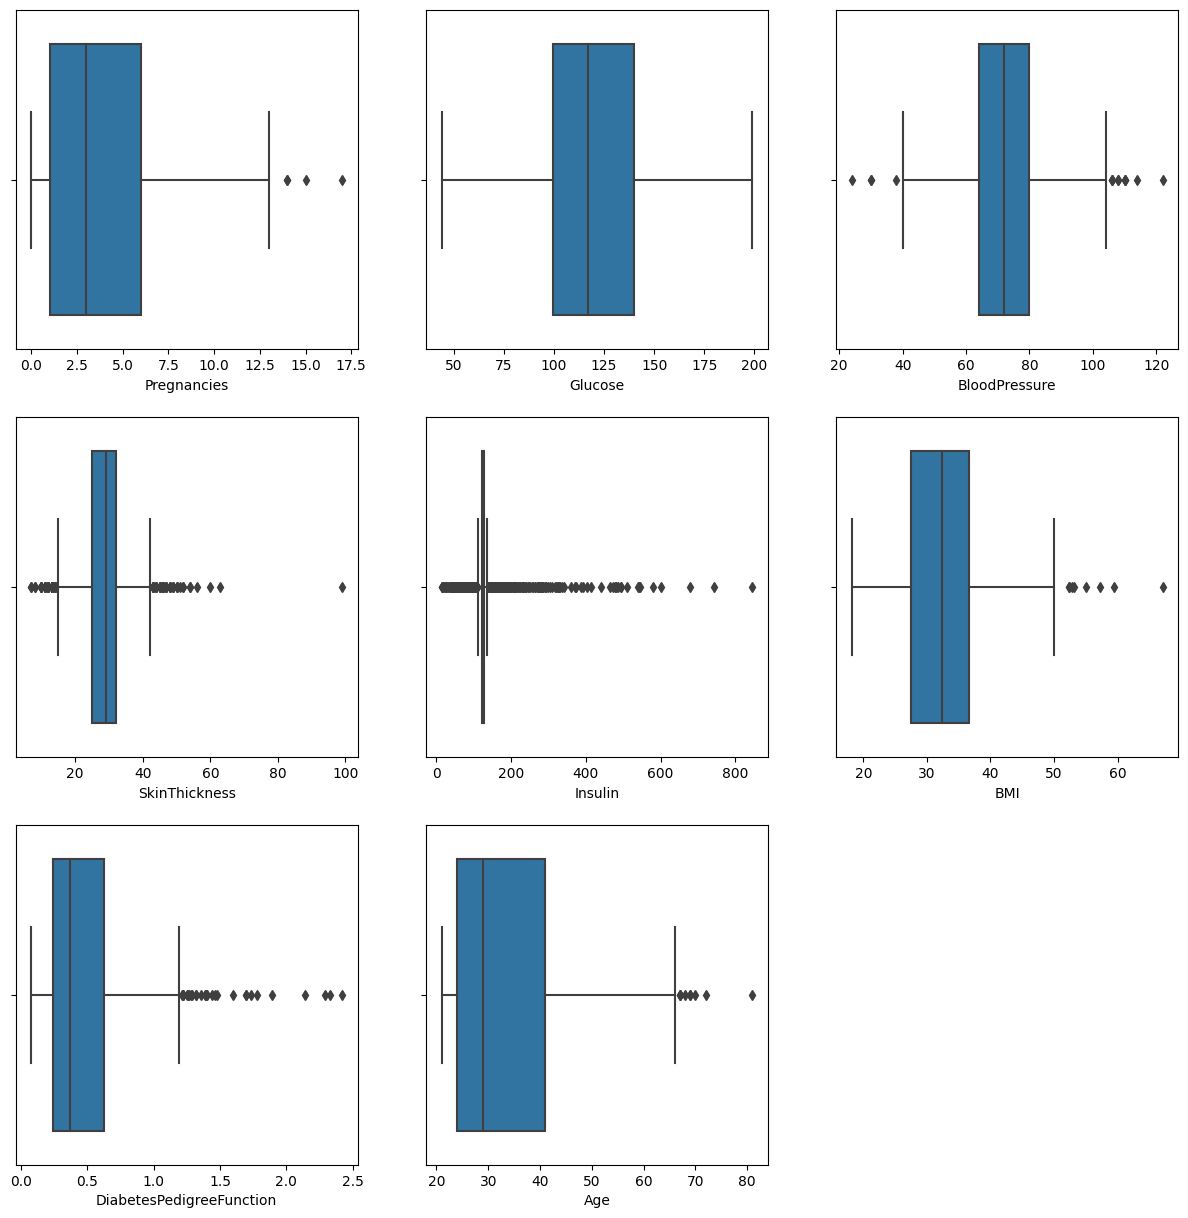

In [20]:
# Box plot
plt.figure(figsize=(15,15))
column=df.columns.to_list()
for i in range(0,len(column)-1):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=column[i],data=df)

plt.show()

In [21]:
# Outliers Detection using the IQR Method
def outliers_detection(column):
    q1=np.quantile(df[column],0.25)
    q3=np.quantile(df[column],0.75)
    IQR=q3-q1
    upper=q3+1.5*IQR
    lower=q1-1.5*IQR
    return np.where(df[column]>upper,upper,np.where(df[column]<lower,lower,df[column]))


In [22]:
for i in range(0,len(column)-1):
    df[column[i]]=outliers_detection(column[i])


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,125.00,26.6,0.35100,31.0,0
1,8.0,183.0,64.0,29.0,125.00,23.3,0.67200,32.0,1
2,1.0,89.0,66.0,23.0,111.25,28.1,0.16700,21.0,0
3,0.0,137.0,40.0,35.0,137.25,43.1,1.19725,33.0,1
4,5.0,116.0,74.0,29.0,125.00,25.6,0.20100,30.0,0


<Axes: >

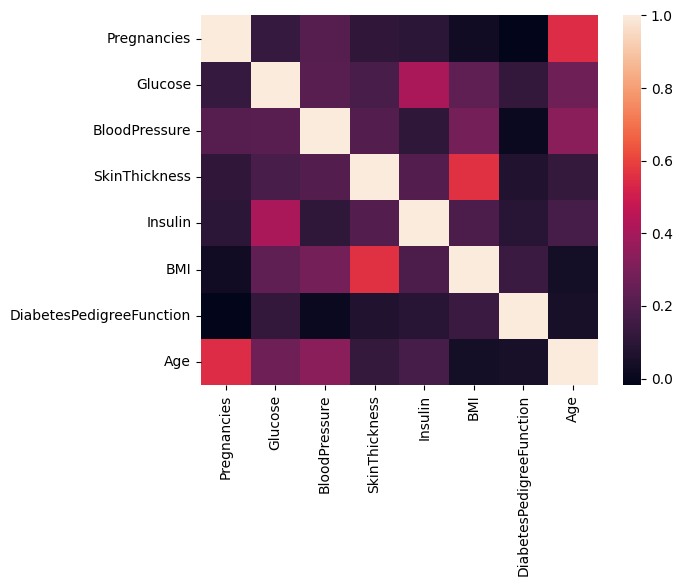

In [24]:
df1=df.drop("Outcome",axis=1)
sns.heatmap(df1.corr(numeric_only=True))

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,125.00,26.6,0.35100,31.0,0
1,8.0,183.0,64.0,29.0,125.00,23.3,0.67200,32.0,1
2,1.0,89.0,66.0,23.0,111.25,28.1,0.16700,21.0,0
3,0.0,137.0,40.0,35.0,137.25,43.1,1.19725,33.0,1
4,5.0,116.0,74.0,29.0,125.00,25.6,0.20100,30.0,0


In [27]:
df.to_csv("Diabetes.csv")